![img](https://bppentictonwn.wpenginepowered.com/wp-content/uploads/2021/01/24011147_web1_210127-PWN-Superstorecovid_1-640x427.jpg)

### Superstore sales DataSet

**Analyzing sales made in superstore**


**DataSet**  :   [Superstore Sales]

## Setting up the environment

In [4]:
#importing the libraries and data
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

warnings.filterwarnings('ignore')

## Getting familiar with data

In [5]:
data = pd.read_csv("superstore1.csv") # loading a dataset in pandas
data.sample(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
17146,ES-2012-4702768,10/30/2012,11-04-2012,Standard Class,Frank Merwin,Home Office,Alsace,France,EU,Central,...,Technology,Copiers,"Hewlett Ink, Laser",632,5.0,0.15,-22.4100,29.66,Medium,2012
6207,IN-2011-71739,10/15/2011,10/20/2011,Standard Class,Fred Wasserman,Corporate,Dhaka,Bangladesh,APAC,Central Asia,...,Technology,Copiers,"Hewlett Fax Machine, Digital",959,3.0,0.00,373.8600,80.93,Medium,2011
12297,ES-2012-2555687,06-06-2012,06-10-2012,Standard Class,Sonia Sunley,Consumer,Ile-de-France,France,EU,Central,...,Furniture,Furnishings,"Advantus Frame, Durable",973,9.0,0.00,106.9200,45.59,Medium,2012
4948,CA-2011-117765,09-07-2011,9/13/2011,Standard Class,Rick Bensley,Home Office,Oklahoma,United States,US,Central,...,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,32,2.0,0.00,15.3888,3.07,Medium,2011
36111,CA-2014-105410,3/20/2014,3/23/2014,First Class,Natalie DeCherney,Consumer,California,United States,US,West,...,Technology,Accessories,Logitech K350 2.4Ghz Wireless Keyboard,100,2.0,0.00,10.9494,24.31,High,2014
38329,ES-2014-5241576,5/19/2014,5/22/2014,First Class,Adrian Barton,Consumer,Nord-Pas-de-Calais,France,EU,Central,...,Office Supplies,Art,"Stanley Highlighters, Fluorescent",32,2.0,0.00,11.7600,2.47,Medium,2014
48192,AG-2014-2600,11/18/2014,11/20/2014,Second Class,Daniel Raglin,Home Office,Alger,Algeria,Africa,Africa,...,Office Supplies,Paper,"SanDisk Note Cards, 8.5 x 11",30,1.0,0.00,7.7100,3.30,Medium,2014
29587,IS-2013-6570,10-04-2013,10-06-2013,First Class,Ralph Arnett,Consumer,Jerusalem,Israel,EMEA,EMEA,...,Technology,Accessories,"Memorex Memory Card, USB",102,1.0,0.00,24.5700,28.65,Critical,2013
14467,ES-2012-5515506,8/16/2012,8/21/2012,Standard Class,Justin Deggeller,Corporate,England,United Kingdom,EU,North,...,Office Supplies,Binders,"Acco Binder Covers, Clear",64,5.0,0.00,27.4500,4.80,Medium,2012
13801,MX-2012-169047,7/25/2012,7/29/2012,Standard Class,Barry Gonzalez,Consumer,Distrito Federal,Mexico,LATAM,North,...,Office Supplies,Supplies,"Kleencut Ruler, Serrated",14,2.0,0.00,3.9600,1.35,High,2012


In [6]:
obs, feat = data.shape # checking shape of the dataset
print(str("So the dataset consist of " + str(obs) + " observations and " + str(feat) + " features. Features are following:"))

So the dataset consist of 51290 observations and 21 features. Features are following:


* order_id
* order_date
* ship_date
* ship_mode (Standard Class, Second Class, First Class, Same Day)
* customer_name
* segment (Consumer, Home Office, Corporate)
* state
* country
* market
* region
* product_id
* category (Office Supplies, Furniture, Technology)
* sub_category
* product_name
* sales
* quantity
* discount
* profit
* shipping_cost
* order_priority
* year

##### Now let's take a look at how data looks like and check if any missing values are present.

In [7]:
data.info() # Understanding the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51052 non-null  object 
 15  quantity        51104 non-null  float64
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

* There seems to be two columns with missing values in the dataset. And one of them have data type "object" which should be "int64". Additionally, the Date columns are also not in the Date-Time format.

In [8]:
data.isnull().sum() # Checking if any null values are present

order_id            0
order_date          0
ship_date           0
ship_mode           0
customer_name       0
segment             0
state               0
country             0
market              0
region              0
product_id          0
category            0
sub_category        0
product_name        0
sales             238
quantity          186
discount            0
profit              0
shipping_cost       0
order_priority      0
year                0
dtype: int64

> ** 📌 Points to note :** 
> * It seems that we have two columns with null values i.e. sales and quantity.


Nice to see, that there are not so many missing values of variables. Let's move futher and do some manipulations with data. 

# Data manipulation

Let's convert 'order_date' and 'ship_date' columns to 'datetime' format. And also remove null values and duplicate entries if any present. 

In [ ]:
data['order_date'] = pd.to_datetime(data['order_date']) # converting order dates to datetime
data['ship_date'] = pd.to_datetime(data['ship_date']) # converting shipment dates to datetime

In [9]:
data['sales'] = data['sales'].str.replace(',','') # removing commas (,) present in the column
data['sales'] = data['sales'].str.replace('null','') # removing 'null' string from the column

In [10]:
# For better accuracy replacing null values with mean values of sales
sales = data['sales'].copy()
sales = sales.dropna().astype('int').mean()
sales_mean = int(sales)
data['sales'] = data['sales'].fillna(value=sales_mean).astype('int')
data['sales'] = data['sales'].replace(0,sales_mean)

In [11]:
# For better accuracy replacing null values with mean values of quantity
quantity_mean = int(data.quantity.mean())
data['quantity'] = data['quantity'].fillna(value=quantity_mean).astype('int')

In [12]:
data.describe().round(2) # Shows detailed overview of integer and float columns of the dataset

,sales,quantity,discount,profit,shipping_cost,year
count,51290.00,51290.00,51290.00,51290.00,51290.00,51290.00
mean,243.14,3.44,0.14,28.64,26.38,2012.78
std,483.79,2.19,0.21,174.42,57.30,1.10
min,1.00,1.00,0.00,-6599.98,0.00,2011.00
25%,30.00,2.00,0.00,0.00,2.61,2012.00
50%,84.00,3.00,0.00,9.24,7.79,2013.00
75%,246.00,5.00,0.20,36.81,24.45,2014.00
max,22638.00,13.00,0.85,8399.98,933.57,2014.00


Now let's check how many unique values present in each column. 

In [13]:
data.nunique().sort_values()

category              3
segment               3
year                  4
order_priority        4
ship_mode             4
market                7
region               13
quantity             13
sub_category         17
discount             27
country             147
customer_name       795
state              1094
order_date         1430
ship_date          1464
sales              2204
product_name       3788
shipping_cost     10037
product_id        10292
profit            24575
order_id          25035
dtype: int64

From this we can see there are Five categorical columns.i.e. category, segment, year, order_priority, ship_mode

## Checking unique values in segment, category, product_name

In [14]:
data["segment"].unique()  #unique value in segment

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [15]:
data["category"].unique()  #unique value in category

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [16]:
data["product_name"].unique()   # unique value in product_name

array(['Tenex Lockers, Blue', 'Acme Trimmer, High Speed',
       'Tenex Box, Single Width', ...,
       'Panasonic BusinessÿTelephonesÿKX-T7736',
       'Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order',
       'Acco Glide Clips'], dtype=object)

## Checking duplicate value in dataset

In [17]:
data.duplicated().sum()

0

## Lets check datatype of all columns 

In [18]:
data.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                      int32
quantity                   int32
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

### Which are the most selling products?

In [19]:
boughts = data.groupby('product_name').agg({'quantity': 'sum'}).sort_values('quantity',ascending=False)[:5]
boughts

,quantity
product_name,
Staples,865
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Stockwell Paper Clips, Assorted Sizes",253


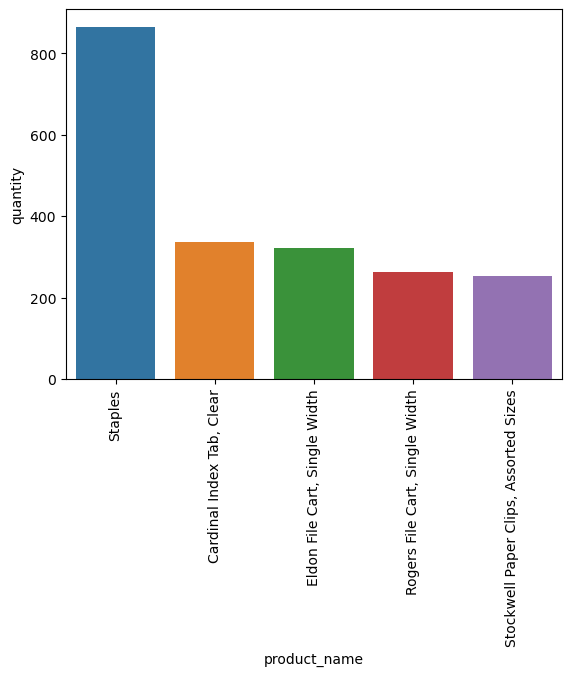

In [20]:
sns.barplot(x='product_name',y='quantity',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

### Which are the Top 10 products by sales?

In [21]:
boughts = data.groupby('product_name').agg({'sales': 'sum'}).sort_values('sales',ascending=False)[:10]
boughts

,sales
product_name,
"Apple Smart Phone, Full Size",76816
"Cisco Smart Phone, Full Size",76441
"Motorola Smart Phone, Full Size",73159
"Nokia Smart Phone, Full Size",71651
Canon imageCLASS 2200 Advanced Copier,61600
"Hon Executive Leather Armchair, Adjustable",52920
"Office Star Executive Leather Armchair, Adjustable",50667
"Harbour Creations Executive Leather Armchair, Adjustable",50120
"Samsung Smart Phone, Cordless",46124


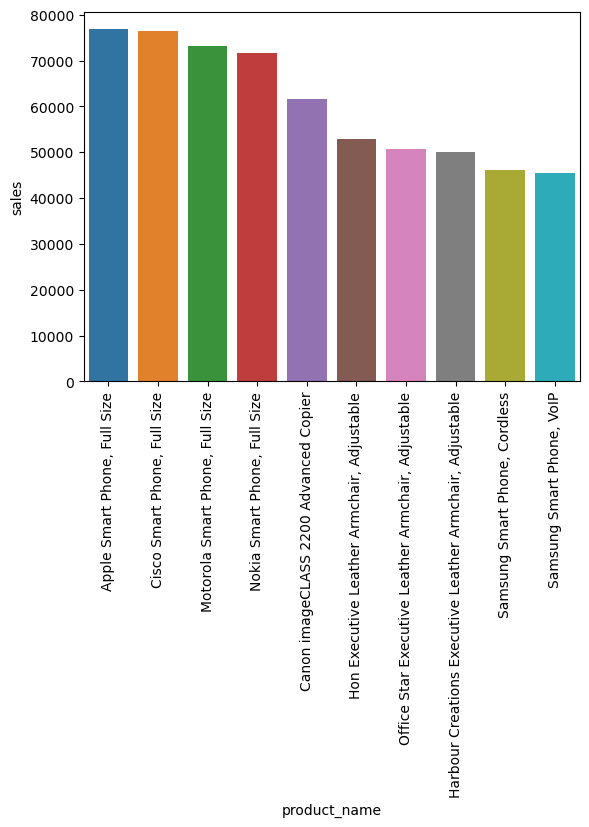

In [22]:
sns.barplot(x='product_name',y='sales',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

### Which are the most profitable products?

In [23]:
profitable_category = pd.DataFrame(data.groupby(['category']).sum()['profit'])
profitable_category.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_category

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


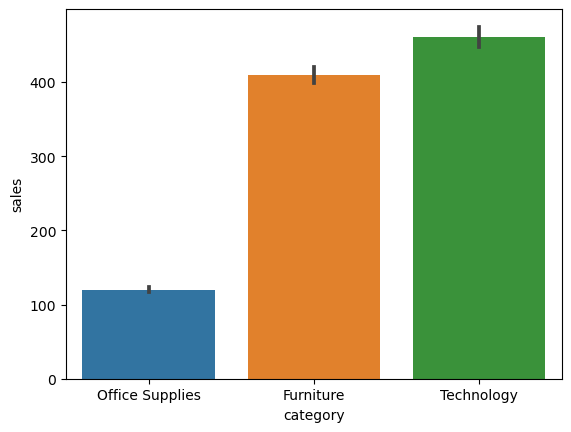

In [24]:
sns.barplot(x = 'category', y = 'sales', data = data)
plt.show()

### Which customer segments are the most profitable ?

In [25]:
profitable_segment = pd.DataFrame(data.groupby(['segment']).sum()['profit'])
profitable_segment.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_segment

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


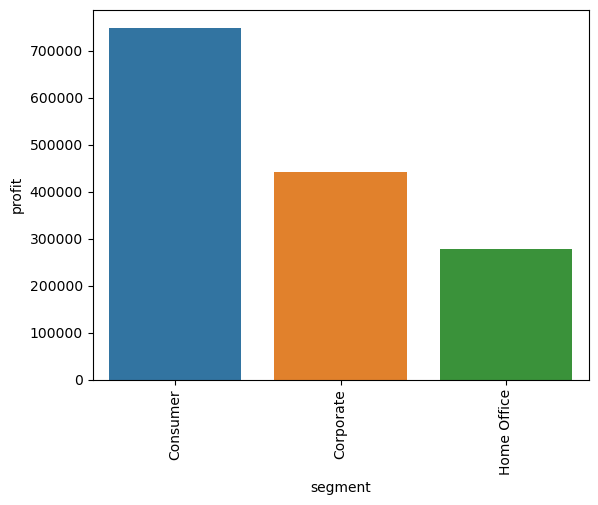

In [26]:
sns.barplot(x='segment',y='profit',data=profitable_segment.reset_index())
plt.xticks(rotation = 'vertical')
plt.show()

### What shipping modes sold the most products?

In [27]:
prod_sales = data.groupby('ship_mode')["sales"].sum().round()
prod_sales.sort_values(ascending=False)

ship_mode
Standard Class    7482108
Second Class      2535176
First Class       1797175
Same Day           656233
Name: sales, dtype: int32

### What market sold the most products?

In [28]:
prod_sales = data.groupby('market')["sales"].sum().round()
prod_sales.sort_values(ascending=False)

market
APAC      3544634
EU        2893085
US        2265784
LATAM     2134059
EMEA       794742
Africa     772166
Canada      66222
Name: sales, dtype: int32

### Visualize the 'Category' column from the Shipmode column dataset standpoints.

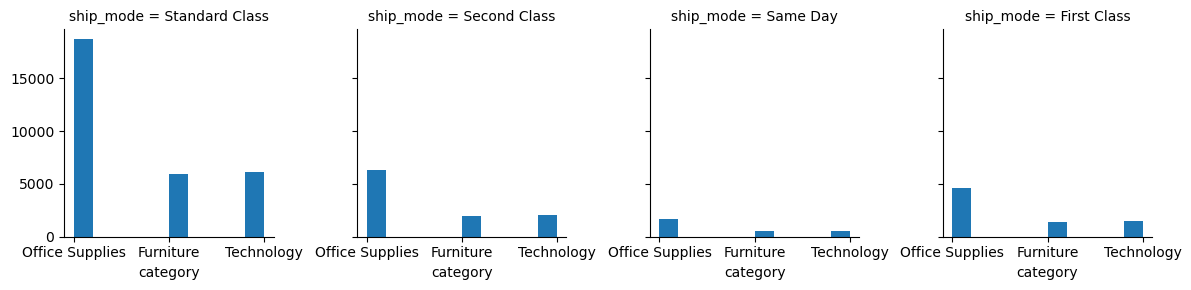

In [29]:
category_hist = sns.FacetGrid(data, col='ship_mode', palette='rainbow')
category_hist.map(plt.hist, 'category')

### Total sales values by category and subcategory

In [30]:
data.groupby(['category','sub_category']).sum()

sales  quantity  discount        profit  \
category        sub_category                                              
Furniture       Bookcases     1442812      8277   370.710  161924.41950   
                Chairs        1478066     12127   560.120  141973.79750   
                Furnishings    382578     11115   478.880   46967.42550   
                Tables         745486      3072   250.320  -64083.38870   
Office Supplies Appliances     991825      5990   248.700  141680.58940   
                Art            375247     16070   573.080   57953.91090   
                Binders        454615     21132  1102.480   72449.84600   
                Envelopes      172047      8281   320.810   29601.11630   
                Fasteners       86672      8313   340.240   11525.42410   
                Labels          75877      9212   313.890   15010.51200   
                Paper          247331     12701   387.300   59207.68270   
                Storage       1106794     16752   700.490  108461.48980   
                Supplies       245776      8400   310.200   22583.26310   
Technology      Accessories    736694     10781   370.480  129626.30620   
                Copiers       1487992      7410   260.418  258567.54818   
                Machines       768071      4873   252.000   58867.87300   
                Phones        1672809     11760   489.610  216717.00580   

                              shipping_cost      year  
category        sub_category                           
Furniture       Bookcases         155482.23   4852847  
                Chairs            164229.85   6911889  
                Furnishings        40747.12   6380451  
                Tables             79861.46   1732979  
Office Supplies Appliances        108300.78   3532371  
                Art                41287.47   9828413  
                Binders            48181.99  12382700  
                Envelopes          18547.78   4901146  
                Fasteners           9053.59   4870955  
                Labels              8059.88   5245285  
                Paper              26661.29   7121179  
                Storage           120546.46  10182612  
                Supplies           24812.05   4881018  
Technology      Accessories        83513.58   6189269  
                Copiers           159496.49   4474471  
                Machines           79135.90   2990958  
                Phones            184902.77   6756800

### Profit state wise top 10

In [31]:
pro_state_wise=data.groupby('state')['profit'].mean().sort_values(ascending=[False]).head(10)
pro_state_wise

state
Paysand£           868.120000
Shizuoka           505.246364
Mie                361.500000
Rajshahi           341.784000
Qinghai            341.752500
Zagrebacka         338.340000
Podgorica          321.690000
Sulawesi Tengah    319.367700
Sikasso            317.160000
Maysan             317.047500
Name: profit, dtype: float64

### Which are the Top 10 country by sales?

In [50]:
countries = pd.DataFrame(data.groupby('country').sum()['sales'])
countries.sort_values('sales',inplace=True, ascending=False)
countries.head(10)

,sales
country,
United States,2265784
Australia,918089
France,838547
China,695712
Germany,619219
Mexico,614786
India,579363
United Kingdom,526733
Indonesia,398405


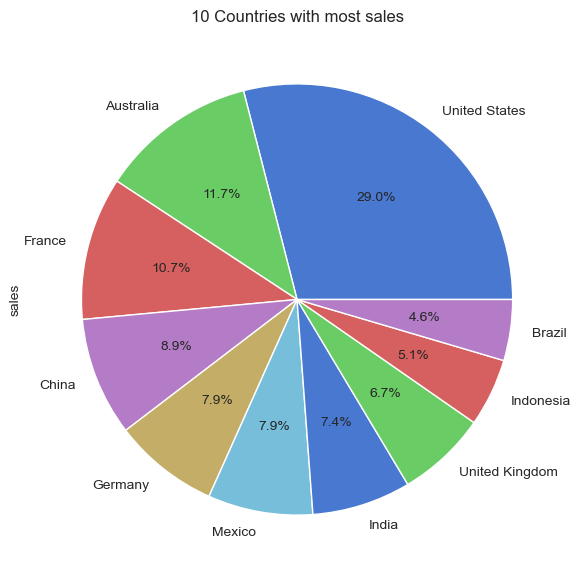

In [51]:
countries = countries.sort_values(by = 'sales',ascending = False)[0:10]
countries['sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 Countries with most sales')
plt.show()

### Which are the most selling products in subcategory?

In [34]:
data.groupby(["category", "sub_category"], as_index=False)["quantity"].count()

,category,sub_category,quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


### Who are the top-10 most profitable customers?

In [35]:
data.groupby(["customer_name"])["profit"].sum().round().sort_values(ascending=False).head(10)

customer_name
Tamara Chand       8673.0
Raymond Buch       8453.0
Sanjit Chand       8205.0
Hunter Lopez       7817.0
Bill Eplett        7410.0
Harry Marie        6958.0
Susan Pistek       6484.0
Mike Gockenbach    6459.0
Adrian Barton      6417.0
Tom Ashbrook       6312.0
Name: profit, dtype: float64

### What market sold the most products?

<AxesSubplot:xlabel='market', ylabel='count'>

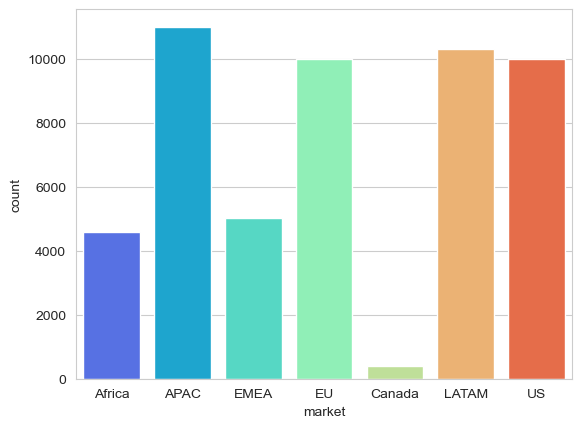

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='market',data=data, palette='rainbow')

### Which are the average shipping cost for top 10 different countries?

In [52]:
data.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost', ascending=False).round(2).head(10)

,shipping_cost
country,
Taiwan,155.66
Chad,148.97
Lesotho,135.65
Montenegro,93.94
Slovenia,61.22
Republic of the Congo,59.30
Central African Republic,57.63
Namibia,50.37
Bangladesh,46.40


* From this we can see there are Five categorical columns.i.e. category, segment, year, order_priority, ship_mode

### Lets analyse sale by month, year, week to gain the insights of sale.

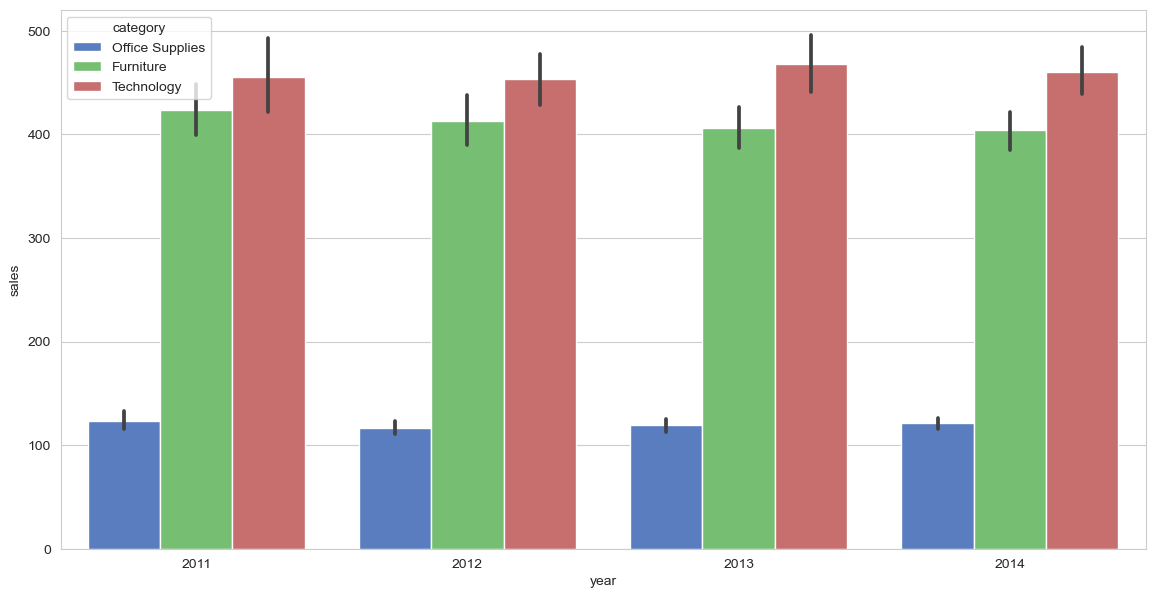

In [57]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x = 'year', y = 'sales', hue = 'category', data = data)
sns.move_legend(ax, "upper left")
plt.show ()

In [59]:
groups = data.groupby(data['category'])[['order_date','sales']]

# grouping data monthwise
dictionary = {}
for group in groups:
    dictionary[group[0]] = group[1].groupby(group[1]['order_date'].dt.month)[['sales']].sum()['sales']
month = pd.DataFrame(dictionary)
month

,Furniture,Office Supplies,Technology
order_date,,,
1,224953,222063,222529
2,183895,152533,203580
3,248904,219678,285702
4,206104,225391,256354
5,276977,278914,341197
6,407751,369429,477288
7,224700,235760,280675
8,385810,398536,484167
9,490271,419404,503230


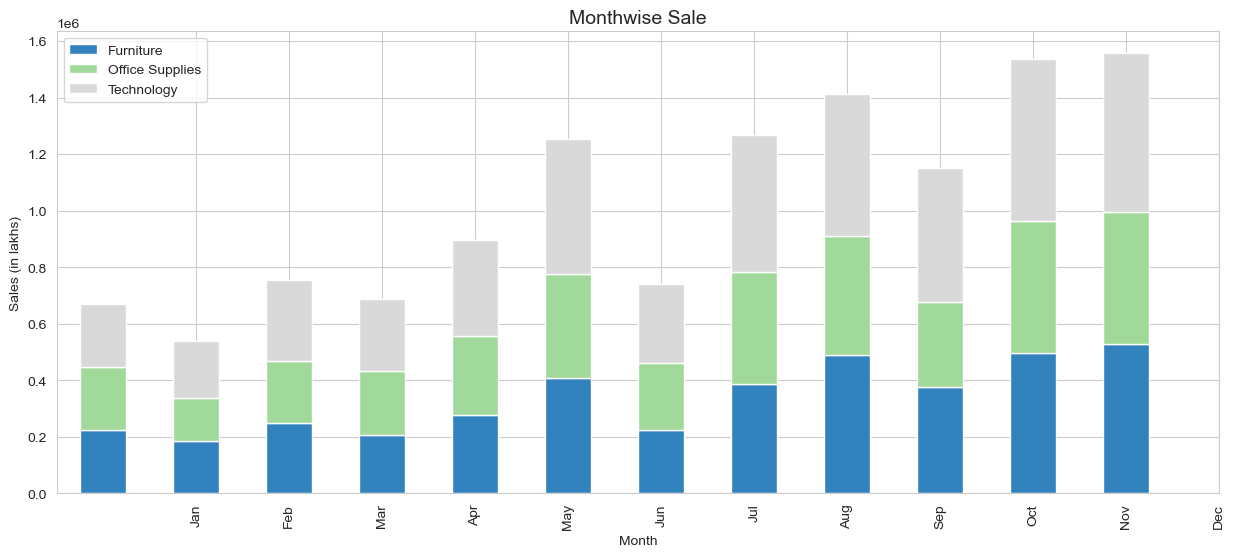

In [39]:
# ploting monthly data
month.plot(kind='bar', stacked=True, figsize = (15, 6), colormap = 'tab20c')
plt.xticks(month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Sales (in lakhs)', fontsize=10)
plt.title('Monthwise Sale', loc='Center', fontsize=14)
plt.show()


In [40]:
#Creating a new column for stating cost to company. e.g- shipping cost and discounts are expenses of the company.
data["cost_to_company"]=data["discount"] + data['shipping_cost']
data["cost_to_company"]

0        35.46
1         9.82
2         8.17
3         5.32
4         4.80
         ...  
51285     1.09
51286     0.49
51287     0.35
51288     0.20
51289     0.37
Name: cost_to_company, Length: 51290, dtype: float64

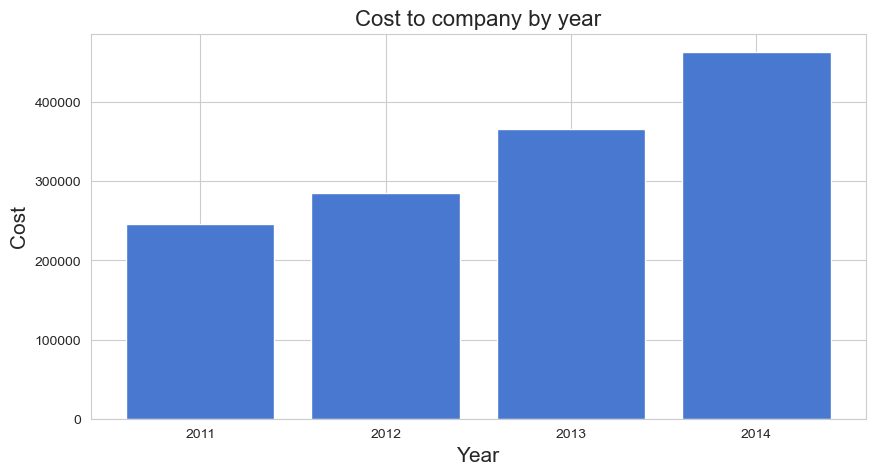

In [66]:
# Plotting cost to company per year
year_groups = data.groupby('year')['cost_to_company'].sum()
years = list(year_groups.index)
values = list(year_groups)

fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot()
ax1.bar(years,values)
plt.xticks(year_groups.index)
plt.title('Cost to company by year', fontsize=16)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Cost', fontsize=15)
plt.show()

In [72]:
# grouping data weekwise
dictionary = {}
for group in groups:
    dictionary[group[0]] = group[1].groupby(group[1]['order_date'].dt.weekday)[['profit']].sum()['profit']
week = pd.DataFrame(dictionary)
week

,Furniture,Office Supplies,Technology
order_date,,,
0,46666.9459,87038.2600,118041.35036
1,49200.5190,90527.9909,113013.41392
2,35464.4905,92024.8489,114916.22216
3,59917.9159,82590.0600,135858.45582
4,53158.6135,106501.1866,117094.16714
5,30221.1827,50851.5134,56416.37206
6,12152.5863,8939.9745,8438.75172


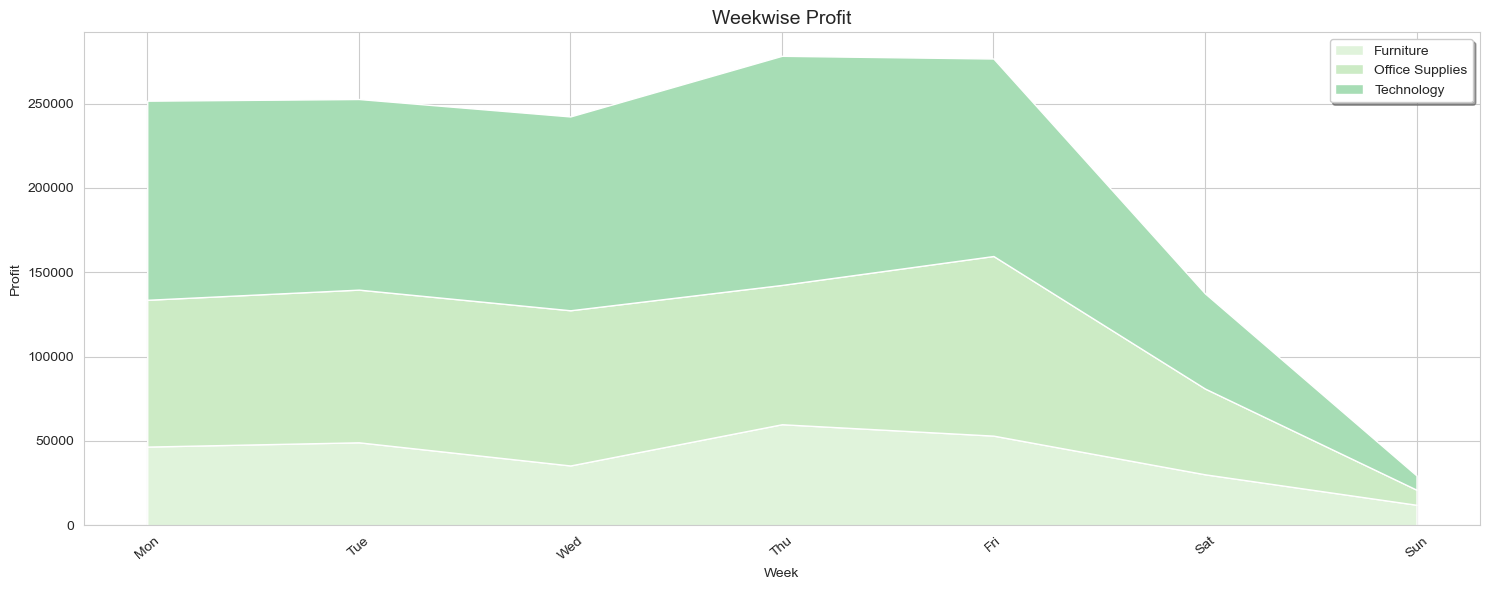

In [73]:
# ploting weekly data
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
colors = sns.color_palette("GnBu", 7)
plt.figure(figsize=(15, 6))
plt.stackplot(weekdays, week['Furniture'], week['Office Supplies'], week['Technology'], colors=colors, labels=week.columns)
plt.legend(loc='upper right', shadow=True)
plt.xticks(weekdays, rotation=40)
plt.xlabel('Week', fontsize=10)
plt.ylabel('Profit', fontsize=10)
plt.title('Weekwise Profit', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

In [67]:
groups = data.groupby(data['category'])[['order_date','profit']]

# grouping data monthwise
dictionary = {}
for group in groups:
    dictionary[group[0]] = group[1].groupby(group[1]['order_date'].dt.month)[['profit']].sum()['profit']
month = pd.DataFrame(dictionary)
month

,Furniture,Office Supplies,Technology
order_date,,,
1,14173.7176,30877.3733,28484.29364
2,19115.8918,21739.2815,31654.55592
3,18728.9795,35759.8067,39598.73476
4,9840.6855,28672.7340,35000.21174
5,13120.7995,39341.2320,52047.75278
6,29258.4031,45007.1447,72813.86904
7,14154.5949,31613.5087,32301.98812
8,20622.0533,60443.5165,70788.53992
9,48544.2402,61384.1328,60509.81016


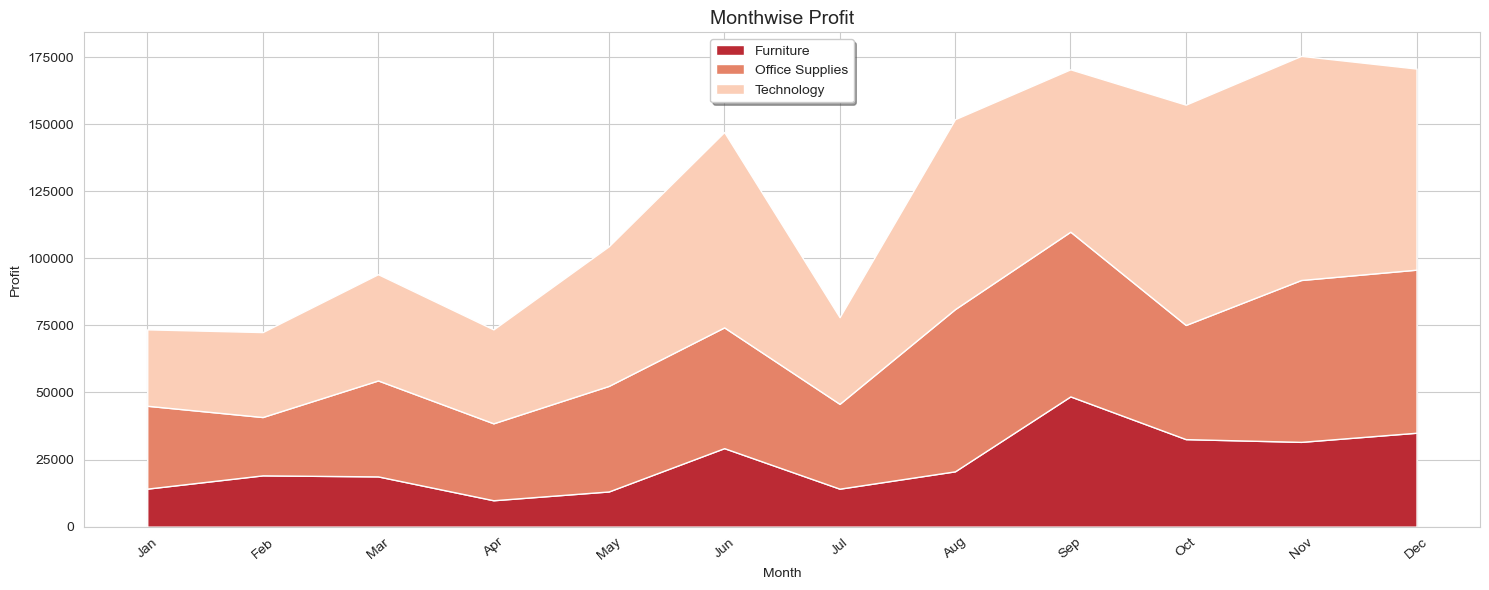

In [68]:
# ploting monthly data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = sns.color_palette("RdBu", 7)
plt.figure(figsize=(15, 6))
plt.stackplot(months, month['Furniture'], month['Office Supplies'], month['Technology'], colors=colors, labels=month.columns)
plt.legend(loc='upper center', shadow=True)
plt.xticks(months, rotation=40)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Profit', fontsize=10)
plt.title('Monthwise Profit', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

> ** 📌 As we can see from the output that there is not much bigger difference in Sale and Profit :** 
> * So from this we can conclude that Profit is directly proportional to Sale.


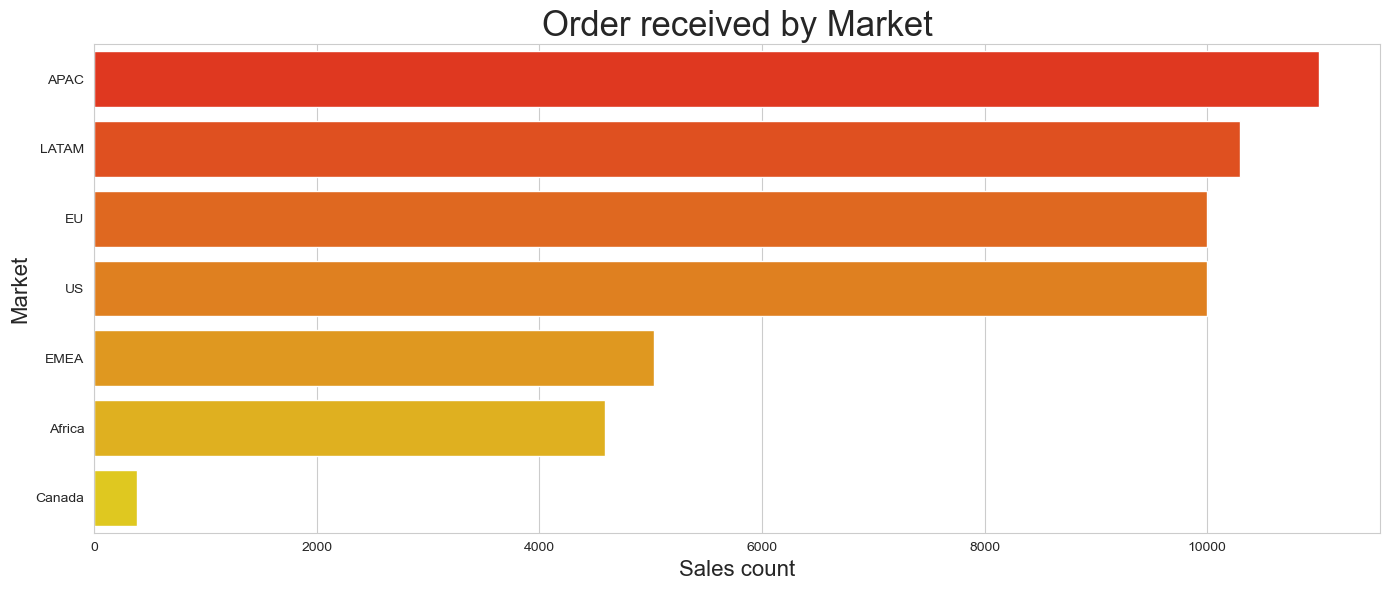

In [43]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y='market', data=data, order = data['market'].value_counts().index, palette='autumn')
ax.set_title(label = "Order received by Market", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Market", fontsize = 16)
plt.tight_layout()
plt.show()

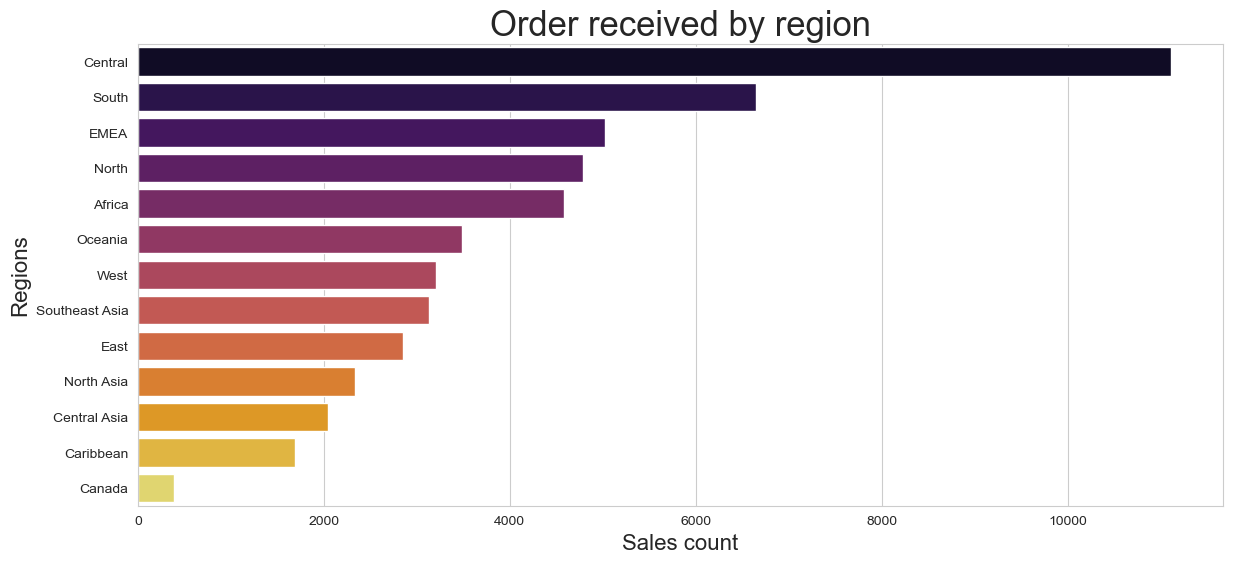

In [44]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y='region', data=data, order = data['region'].value_counts().index, palette='inferno')
ax.set_title(label = "Order received by region", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Regions", fontsize = 16)
plt.show()

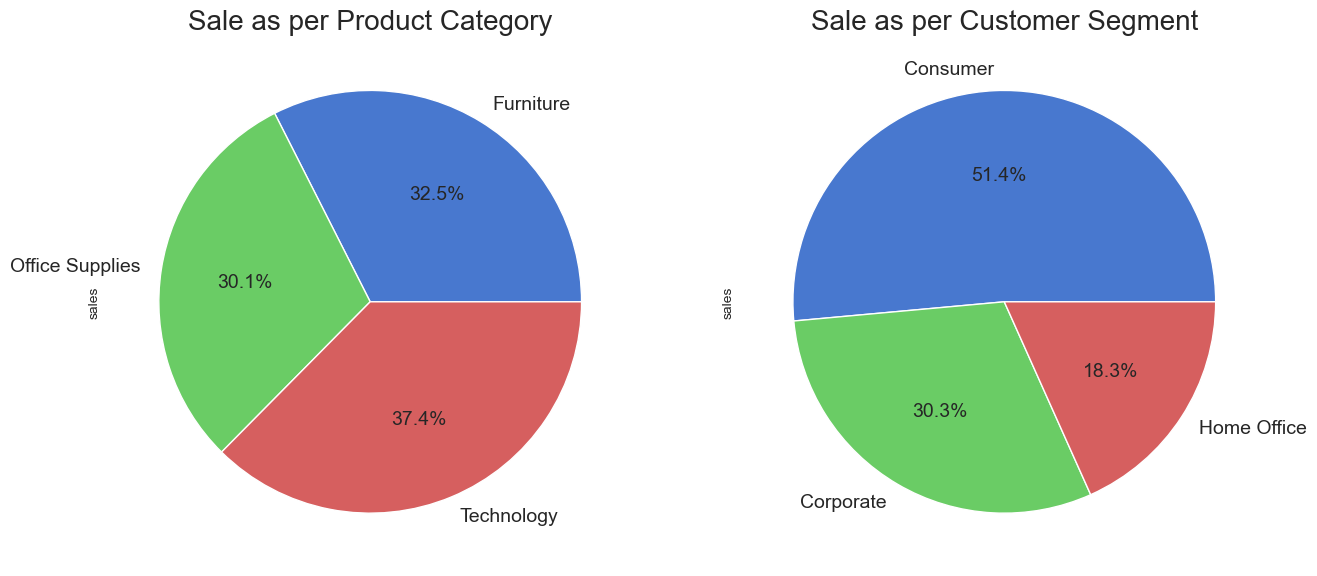

In [87]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

# collecting category wise and segment wise data
category_wise_sale = pd.DataFrame(data.groupby('category').sum()['sales'])
segment_wise_sale = pd.DataFrame(data.groupby('segment').sum()['sales'])

# Creating grids
gs = gridspec.GridSpec(1, 2)
pl.figure(figsize=(15,10))

# plotting pie chart for category
ax = pl.subplot(gs[0, 0]) # row 0, col 1
category_wise_sale['sales'].plot(kind='pie',autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Sale as per Product Category', fontsize = 20)

# plotting pie chart for segment
ax = pl.subplot(gs[0, 1]) # row 0, col 2
segment_wise_sale['sales'].plot(kind='pie',autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Sale as per Customer Segment', fontsize = 20)

plt.show()

### Profit as per region

<AxesSubplot:xlabel='profit', ylabel='region'>

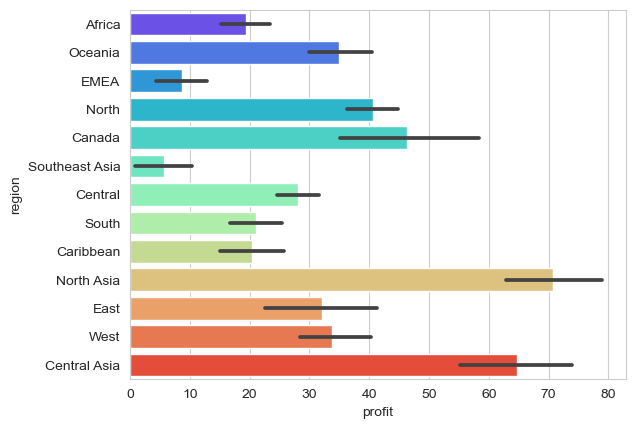

In [46]:
sns.set_style('whitegrid')
sns.barplot(x='profit', y='region',data=data, palette='rainbow')

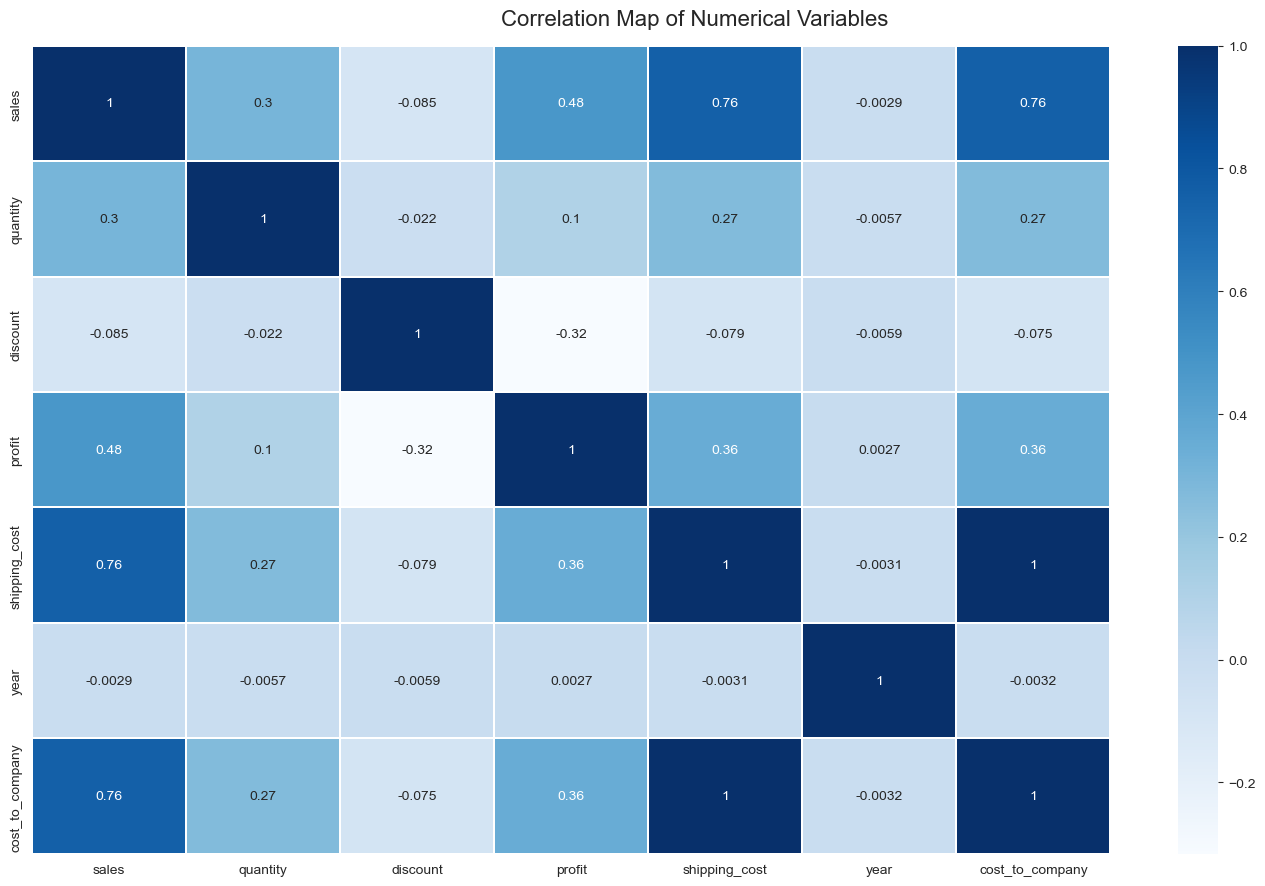

In [47]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(data.corr(), annot=True, cmap='Blues', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontsize='16')
plt.tight_layout()

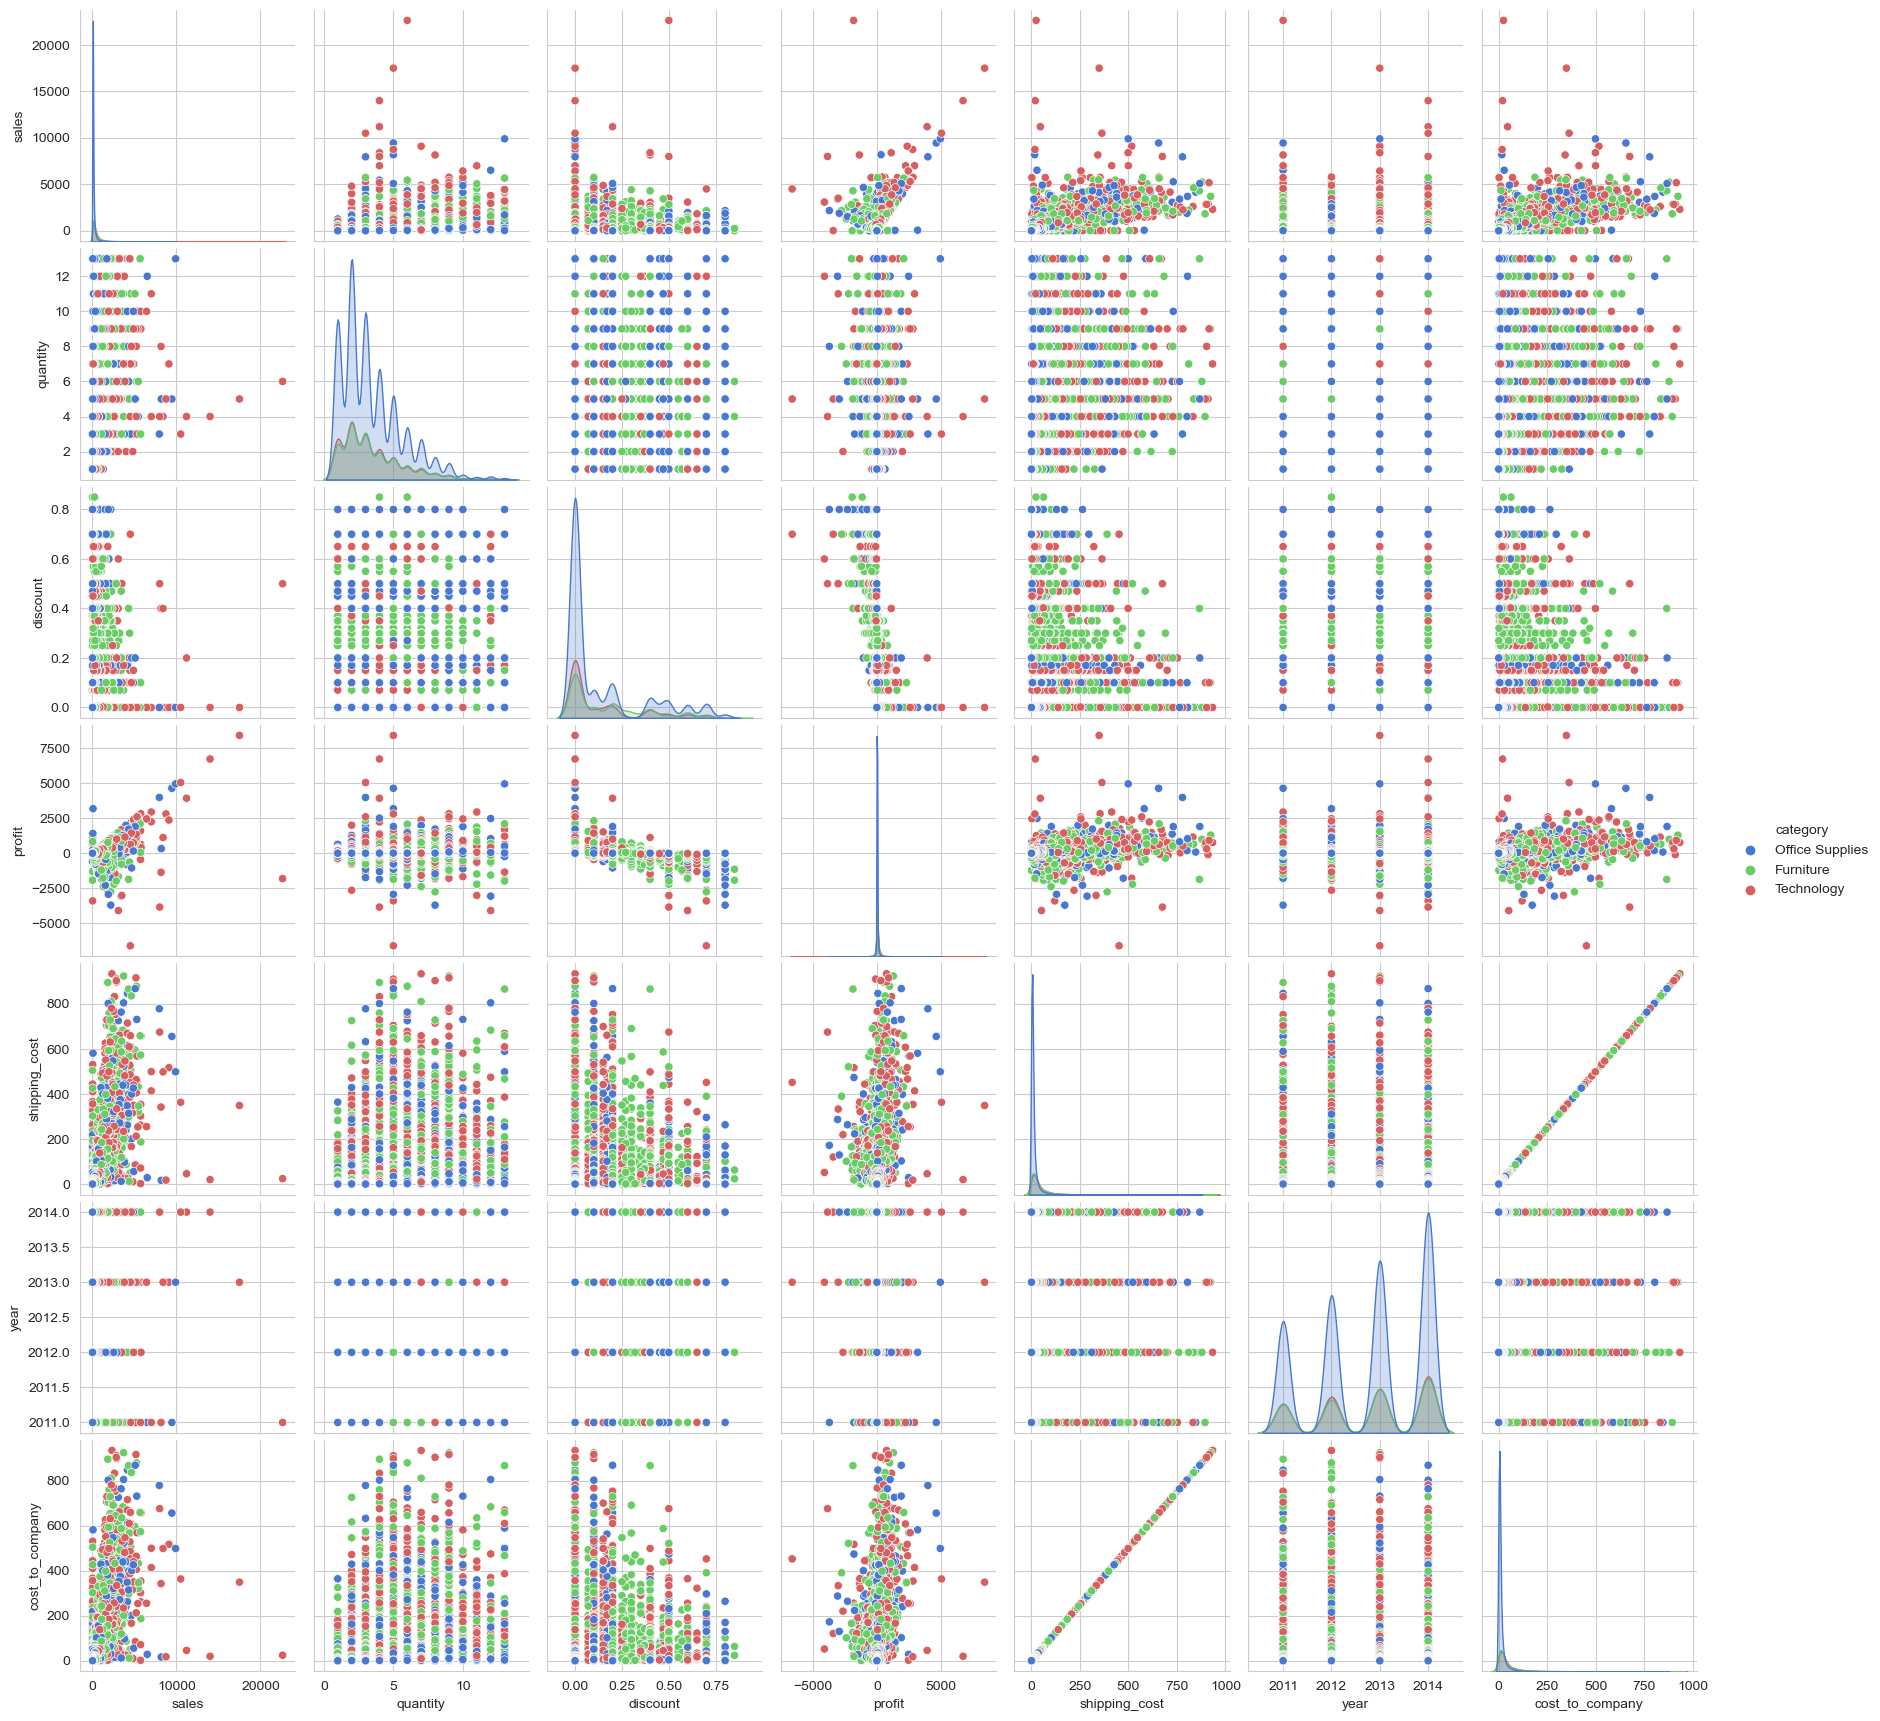

In [48]:
# Ploting pairplot
sns.pairplot(data, hue='category')